In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

In [3]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
X = df[["TV", "Radio", "Newspaper"]]
y = df["Sales"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
df.corr()["Sales"].sort_values(ascending=False)

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64

## REGRESSION

In [8]:
X_train_slr = X_train[["TV"]]
X_test_slr = X_test[["TV"]]

slr = LinearRegression()
slr.fit(X_train_slr, y_train)

y_pred_slr = slr.predict(X_test_slr)

In [9]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

y_pred_mlr = mlr.predict(X_test)

In [10]:
regression_df = pd.DataFrame({
    "Model": ["Simple Linear Regression", "Multiple Linear Regression"],
    "MSE": [
        mean_squared_error(y_test, y_pred_slr),
        mean_squared_error(y_test, y_pred_mlr)
    ],
    "MAE": [
        mean_absolute_error(y_test, y_pred_slr),
        mean_absolute_error(y_test, y_pred_mlr)
    ],
    "R2 Score": [
        r2_score(y_test, y_pred_slr),
        r2_score(y_test, y_pred_mlr)
    ]
})

regression_df

,Model,MSE,MAE,R2 Score
0,Simple Linear Regression,6.101073,1.950295,0.802561
1,Multiple Linear Regression,2.907757,1.274826,0.905901


## CLASSIFICATION

In [11]:
df["Sales_Class"] = (df["Sales"] >= df["Sales"].mean()).astype(int)

X_cls = df[["TV", "Radio", "Newspaper"]]
y_cls = df["Sales_Class"]

In [12]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42
)

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_c)
X_test_scaled = scaler.transform(X_test_c)

In [14]:
nb = GaussianNB()
nb.fit(X_train_c, y_train_c)

y_pred_nb = nb.predict(X_test_c)

In [15]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train_c)

y_pred_knn = knn.predict(X_test_scaled)

In [16]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_c, y_train_c)

y_pred_dt = dt.predict(X_test_c)

In [18]:
classification_df = pd.DataFrame({
    "Model": ["Naive Bayes", "KNN", "Decision Tree"],
    "Accuracy": [
        accuracy_score(y_test_c, y_pred_nb),
        accuracy_score(y_test_c, y_pred_knn),
        accuracy_score(y_test_c, y_pred_dt)
    ],
    "MSE": [
        mean_squared_error(y_test_c, y_pred_nb),
        mean_squared_error(y_test_c, y_pred_knn),
        mean_squared_error(y_test_c, y_pred_dt)
    ],
    "MAE": [
        mean_absolute_error(y_test_c, y_pred_nb),
        mean_absolute_error(y_test_c, y_pred_knn),
        mean_absolute_error(y_test_c, y_pred_dt)
    ],
    "R2 Score": [
        r2_score(y_test_c, y_pred_nb),
        r2_score(y_test_c, y_pred_knn),
        r2_score(y_test_c, y_pred_dt)
    ]
})

classification_df

,Model,Accuracy,MSE,MAE,R2 Score
0,Naive Bayes,0.975,0.025,0.025,0.899749
1,KNN,1.000,0.000,0.000,1.000000
2,Decision Tree,1.000,0.000,0.000,1.000000


## AGGREGATED COMPARISON

In [19]:
reg_avg = regression_df[["MSE", "MAE", "R2 Score"]].mean()
clf_avg = classification_df[["MSE", "MAE", "R2 Score"]].mean()

comparison_df = pd.DataFrame({
    "Regression": reg_avg,
    "Classification": clf_avg
})

comparison_df

,Regression,Classification
MSE,4.504415,0.008333
MAE,1.612561,0.008333
R2 Score,0.854231,0.966583


## VISUALIZATIONS

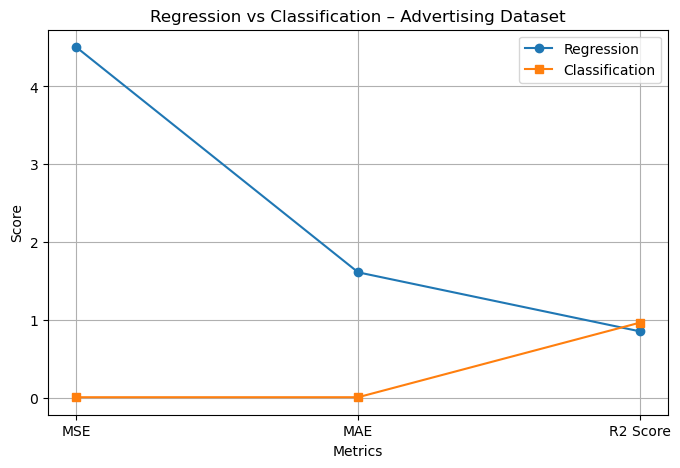

In [20]:
plt.figure(figsize=(8,5))
plt.plot(comparison_df.index, comparison_df["Regression"], marker="o", label="Regression")
plt.plot(comparison_df.index, comparison_df["Classification"], marker="s", label="Classification")

plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Regression vs Classification – Advertising Dataset")
plt.legend()
plt.grid(True)
plt.show()

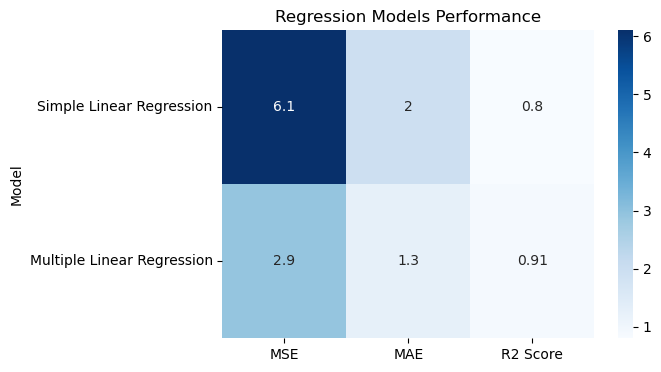

In [21]:
plt.figure(figsize=(6,4))
sns.heatmap(regression_df.set_index("Model"), annot=True, cmap="Blues")
plt.title("Regression Models Performance")
plt.show()

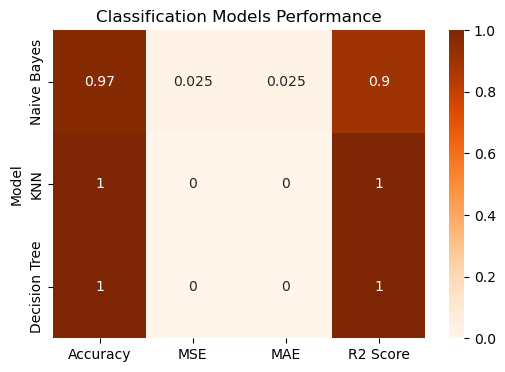

In [22]:
plt.figure(figsize=(6,4))
sns.heatmap(classification_df.set_index("Model"), annot=True, cmap="Oranges")
plt.title("Classification Models Performance")
plt.show()